# "[MachineLearning] Dimensionality Reduction - Principal Component Analysis(PCA)"
> KNU AIR week2

- toc: false
- badges: false
- comments: false
- categories: [dimensionality reduction]
- hide_{github,colab,binder,deepnote}_badge: true

__Content creators:__ 조동현

__Content reviewers:__ 

# 1. Overview

### PCA란?
- Principal Component Analysis 의 약자로 "주성분 분석"을 뜻함

### PCA 의의
- n차원 데이터를 정사영 시켜 k 차원으로 낮출 때, (n > k)
어떤 벡터에 데이터를 정사영 시켜야 원래 데이터의 구조을 제일 잘 유지시킬 수 있는지 알아내는 것 

### PCA 필요성
- 실제 데이터들은 매우 많은 feature를 가지고 있음(= 차원이 높음). 따라서 머신러닝을 적용하여 문제를 해결하는데 있어서 아래와 어려움이 있음
  1. 전체 데이터의 양이 많아 학습 속도가 느려짐
  2. 의미 없는 faeture들에 의해 과적합되거나 원활한 학습이 되지 않음
- 그래서 차원축소를 통해 전체적인 데이터 양을 줄일 필요가 있음

# 2. Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

### 데이터 로드 및 확인

In [2]:
iris = load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 데이터 scale

In [3]:
# 데이터마다 분산량이 다르기 때문에 왜곡 가능성이 있음
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x, columns=iris['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### PCA 실행

In [4]:
pca = PCA(n_components=2)
result = pca.fit_transform(x)
result_df = pd.DataFrame(data=result, columns = ['pc1', 'pc2'])
result_df['species'] = iris['target']
result_df['species'] = result_df['species'].map({0: 'setosa', 1: "versicolor", 2: "virginica"})
result_df.head()

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


#### PCA 결과가 원본 데이터 분산의 96%를 설명한다고 볼 수 있음

In [5]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

### 시각화

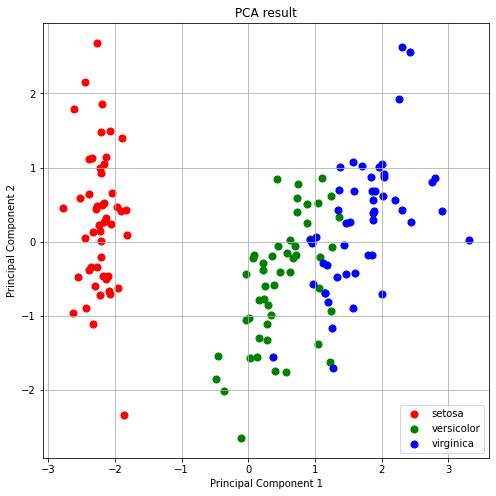

In [6]:
figure = plt.figure(figsize = (8, 8))
axis = figure.add_subplot(1, 1, 1)
axis.set_xlabel('Principal Component 1')
axis.set_ylabel('Principal Component 2')
axis.set_title('PCA result')

targets = iris['target_names']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices = result_df['species'] == target
    axis.scatter(result_df.loc[indices, 'pc1'],
                 result_df.loc[indices, 'pc2'],
                 c = color,
                 s = 50)
axis.legend(targets)
axis.grid()